In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\ExcelR\Assignments\A_17_Support_vector_machines

08-08-2022  19:36    <DIR>          .
08-08-2022  19:36    <DIR>          ..
06-08-2022  21:00    <DIR>          .ipynb_checkpoints
06-08-2022  21:02           330,179 Ass-17_Salary_Data.ipynb
08-08-2022  19:36           473,868 assignment17_support_vector_machine.ipynb
14-07-2022  08:49               549 forest fires.txt
14-07-2022  08:49            46,843 forestfires.csv
14-07-2022  08:49               608 Problem_statement(salary_data).txt
14-07-2022  08:49         1,694,474 SalaryData_Test(1).csv
14-07-2022  08:49         3,393,618 SalaryData_Train(1).csv
               7 File(s)      5,940,139 bytes
               3 Dir(s)  131,102,404,608 bytes free


# Forest Fires

Problem Statement:
Classify the Size_Categorie using SVM

1. month--> month of the year: 'jan' to 'dec'
2. day--> day of the week: 'mon' to 'sun'
3. FFMC--> FFMC index from the FWI system: 18.7 to 96.20
4. DMC--> DMC index from the FWI system: 1.1 to 291.3
5. DC--> DC index from the FWI system: 7.9 to 860.6
6. ISI--> ISI index from the FWI system: 0.0 to 56.10
7. temp--> temperature in Celsius degrees: 2.2 to 33.30
8. RH--> relative humidity in %: 15.0 to 100
9. wind--> wind speed in km/h: 0.40 to 9.40
10. rain--> outside rain in mm/m2 : 0.0 to 6.4
11. Size_Categorie--> the burned area of the forest ( Small , Large)

# Steps:

1. Data Reading
2. Data Preprocessing
3. EDA
4. Data Cleaning
5. Model Creation
6. Model Evaluation

In [5]:
# Reading the data using pandas
df1=pd.read_csv("forestfires.csv")

In [6]:
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
df1.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
df1['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

We can see that data is Imbalanced.

<AxesSubplot:>

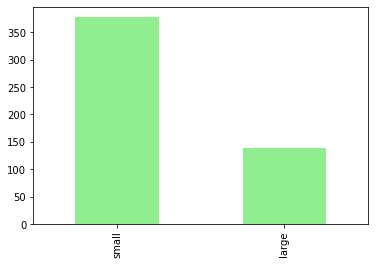

In [10]:
df1['size_category'].value_counts().plot(kind='bar',color='lightgreen')

<Figure size 720x432 with 0 Axes>

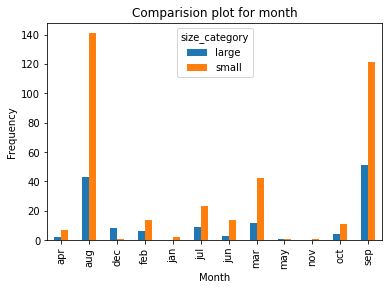

In [11]:
plt.figure(figsize=(10,6))
pd.crosstab(df1['month'],df1['size_category']).plot(kind='bar')
plt.title('Comparision plot for month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

<Figure size 720x432 with 0 Axes>

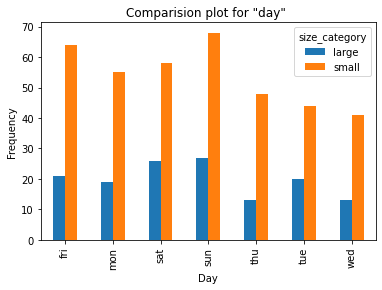

In [12]:
plt.figure(figsize=(10,6))
pd.crosstab(df1['day'],df1['size_category']).plot(kind='bar')
plt.title('Comparision plot for "day" ')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='FFMC', ylabel='Density'>

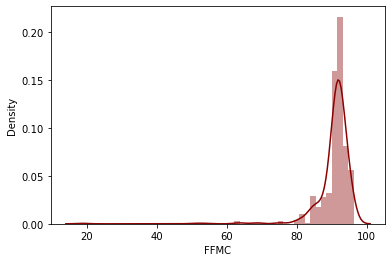

In [13]:
sns.distplot(df1['FFMC'],color='darkred')

<AxesSubplot:xlabel='DMC', ylabel='Density'>

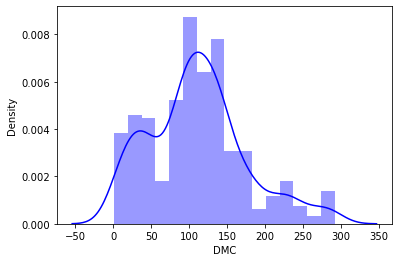

In [14]:
sns.distplot(df1['DMC'],color='blue')

<AxesSubplot:xlabel='DC', ylabel='Density'>

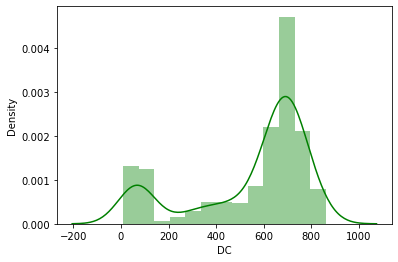

In [15]:
sns.distplot(df1['DC'],color='green')

<AxesSubplot:xlabel='ISI', ylabel='Density'>

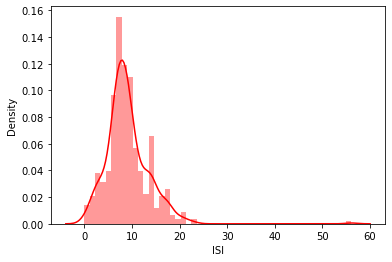

In [16]:
sns.distplot(df1['ISI'],color='red')

<AxesSubplot:xlabel='temp', ylabel='Density'>

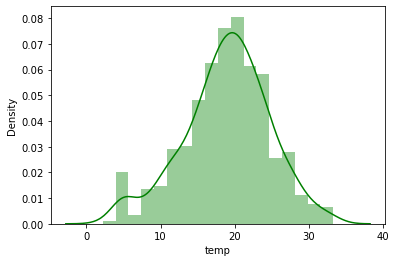

In [17]:
sns.distplot(df1['temp'],color='green')

<AxesSubplot:xlabel='RH', ylabel='Density'>

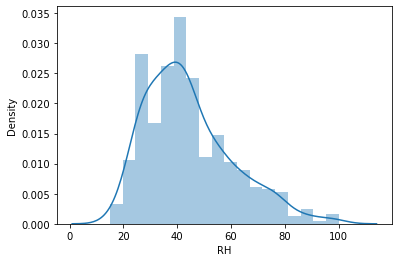

In [18]:
sns.distplot(df1['RH'])

<AxesSubplot:xlabel='wind', ylabel='Density'>

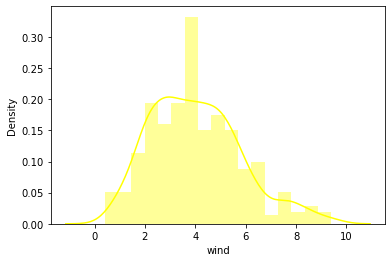

In [19]:
sns.distplot(df1['wind'],color='yellow')

<AxesSubplot:xlabel='rain', ylabel='Density'>

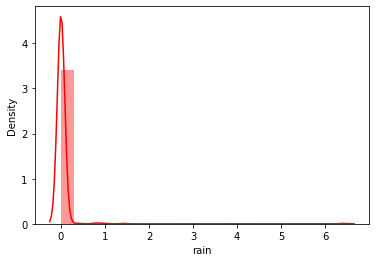

In [20]:
sns.distplot(df1['rain'],color='red')

<AxesSubplot:xlabel='area', ylabel='Density'>

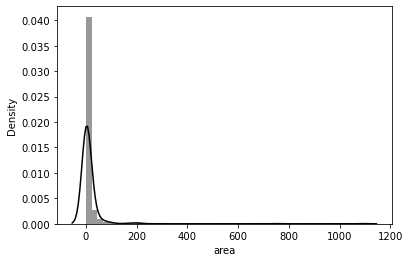

In [21]:
sns.distplot(df1['area'],color='black')

In [22]:
# Splitting the features and Target variable
x=df1.iloc[:,2:-1]
y=df1.iloc[:,-1]

In [23]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [25]:
# Splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=8)

In [26]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(361, 28) (156, 28) (361,) (156,)


# Linear Kernel

In [27]:
# Creating the model

linear_model=SVC(kernel='linear')
linear_model.fit(x_train,y_train)

SVC(kernel='linear')

In [28]:
# Making Predictions

y_train_pred=linear_model.predict(x_train)
y_test_pred=linear_model.predict(x_test)

In [29]:
# Training and Testing Accuracy

print("Accuracy score for Training data ::",accuracy_score(y_train_pred,y_train))
print("Accuracy score for Testing data ::",accuracy_score(y_test_pred,y_test))

Accuracy score for Training data :: 1.0
Accuracy score for Testing data :: 0.9871794871794872


In [30]:
# Confusion matrix
confusion_matrix(y_test,y_test_pred)

array([[ 40,   1],
       [  1, 114]], dtype=int64)

In [31]:
# Classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

       large       0.98      0.98      0.98        41
       small       0.99      0.99      0.99       115

    accuracy                           0.99       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.99      0.99      0.99       156



The precision, recall and f1-score all look great, so the model is Good

# RBF Kernel

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
grid=[{'kernel':['rbf'],'gamma':[50,10,5,1,0.5,0.1,0.005,0.001,0.0001],'C':[15,14,25,20,9,5,12,8,6]}]
rbf_model=GridSearchCV(SVC(),grid)
rbf_model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [15, 14, 25, 20, 9, 5, 12, 8, 6],
                          'gamma': [50, 10, 5, 1, 0.5, 0.1, 0.005, 0.001,
                                    0.0001],
                          'kernel': ['rbf']}])

In [34]:
rbf_model.best_params_

{'C': 25, 'gamma': 0.0001, 'kernel': 'rbf'}

In [35]:
rbf_model.best_score_

0.9168569254185692

In [36]:
# Predictions
y_pred=rbf_model.predict(x_test)

In [37]:
# Accuracy 
accuracy_score(y_test,y_pred)

0.9294871794871795

In [38]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[ 30,  11],
       [  0, 115]], dtype=int64)

In [39]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       large       1.00      0.73      0.85        41
       small       0.91      1.00      0.95       115

    accuracy                           0.93       156
   macro avg       0.96      0.87      0.90       156
weighted avg       0.94      0.93      0.93       156



# The results of Linear kernel is better than RBF hence we will accept that method.

# Salary data

Problem Statement: Prepare a classification model using SVM for salary data 


1. age -- age of a person
2. workclass -- A work class is a grouping of work 
3. education -- Education of an individuals	
4. maritalstatus -- Marital status of an individulas	
5. occupation -- occupation of an individuals
6. relationship -- 	
7. race -- Race of an Individual
8. sex -- Gender of an Individual
9. capitalgain -- profit received from the sale of an investment	
10. capitalloss	-- A decrease in the value of a capital asset
11. hoursperweek -- number of hours work per week	
12. native -- Native of an individual
13. Salary -- salary of an individual


In [40]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\ExcelR\Assignments\A_17_Support_vector_machines

08-08-2022  19:38    <DIR>          .
08-08-2022  19:38    <DIR>          ..
06-08-2022  21:00    <DIR>          .ipynb_checkpoints
06-08-2022  21:02           330,179 Ass-17_Salary_Data.ipynb
08-08-2022  19:38            73,977 assignment17_support_vector_machine.ipynb
14-07-2022  08:49               549 forest fires.txt
14-07-2022  08:49            46,843 forestfires.csv
14-07-2022  08:49               608 Problem_statement(salary_data).txt
14-07-2022  08:49         1,694,474 SalaryData_Test(1).csv
14-07-2022  08:49         3,393,618 SalaryData_Train(1).csv
               7 File(s)      5,540,248 bytes
               3 Dir(s)  131,102,732,288 bytes free


In [76]:
train=pd.read_csv("SalaryData_Train(1).csv")
test=pd.read_csv("SalaryData_Test(1).csv")

In [77]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [78]:
train.shape

(30161, 14)

In [79]:
test.shape

(15060, 14)

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [82]:
# Converting the Target into category
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train['salary']=label_encoder.fit_transform(train['Salary'])
test['salary']=label_encoder.fit_transform(test['Salary'])

In [83]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [84]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,0


In [85]:
# Dropping the "Salary" column
train.drop(columns='Salary',axis=0,inplace=True)
test.drop(columns='Salary',axis=0,inplace=True)

In [86]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [87]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


# EDA

Text(0.5, 1.0, 'Count Plot')

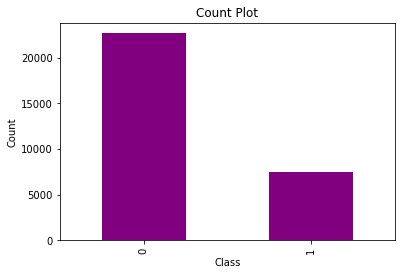

In [88]:
train['salary'].value_counts().plot(kind='bar',color='purple')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title("Count Plot")

We can clearly see that the data is imbalanced

<Figure size 720x432 with 0 Axes>

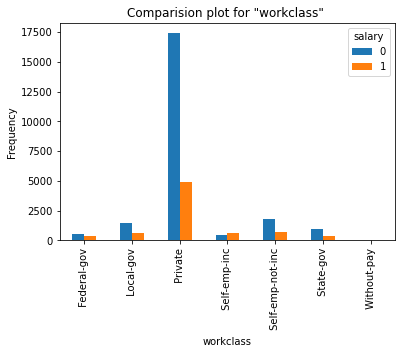

In [89]:
plt.figure(figsize=(10,6))
pd.crosstab(train['workclass'],train['salary']).plot(kind='bar')
plt.title('Comparision plot for "workclass" ')
plt.xlabel('workclass')
plt.ylabel('Frequency')
plt.show()

<Figure size 720x432 with 0 Axes>

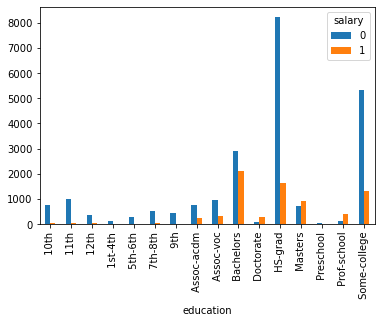

In [90]:
plt.figure(figsize=(10,6))
pd.crosstab(train['education'],train['salary']).plot(kind='bar')
plt.show()

<Figure size 720x432 with 0 Axes>

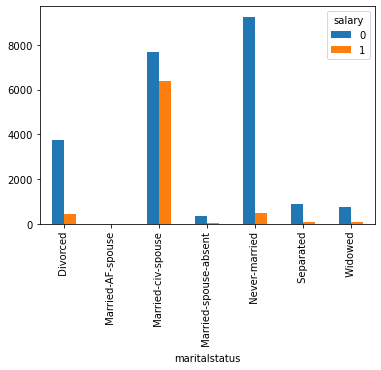

In [91]:
plt.figure(figsize=(10,6))
pd.crosstab(train['maritalstatus'],train['salary']).plot(kind='bar')
plt.show()

<Figure size 1080x576 with 0 Axes>

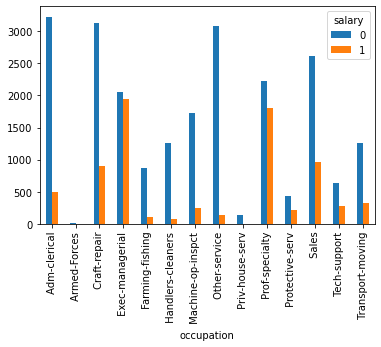

In [92]:
plt.figure(figsize=(15,8))
pd.crosstab(train['occupation'],train['salary']).plot(kind='bar')
plt.show()

<Figure size 1080x576 with 0 Axes>

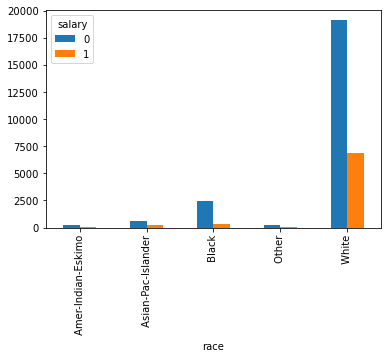

In [93]:
plt.figure(figsize=(15,8))
pd.crosstab(train['race'],train['salary']).plot(kind='bar')
plt.show()

<Figure size 1080x576 with 0 Axes>

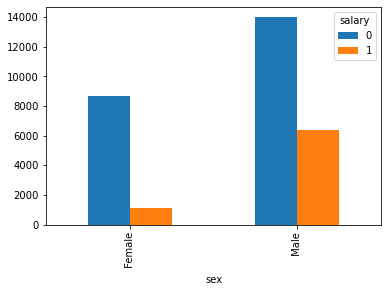

In [94]:
plt.figure(figsize=(15,8))
pd.crosstab(train['sex'],train['salary']).plot(kind='bar')
plt.show()

<Figure size 1080x576 with 0 Axes>

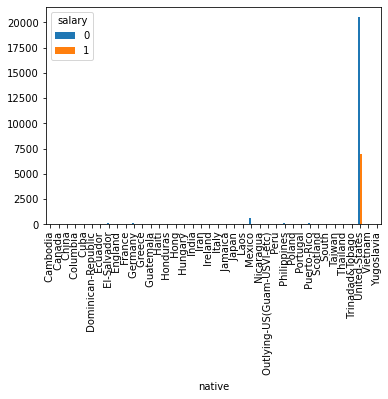

In [95]:
plt.figure(figsize=(15,8))
pd.crosstab(train['native'],train['salary']).plot(kind='bar')
plt.show()

Native is not so useful feature, so we can drop it.

<Figure size 1080x576 with 0 Axes>

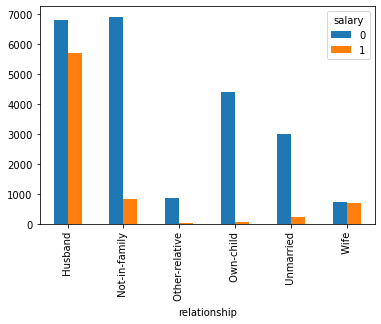

In [96]:
plt.figure(figsize=(15,8))
pd.crosstab(train['relationship'],train['salary']).plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

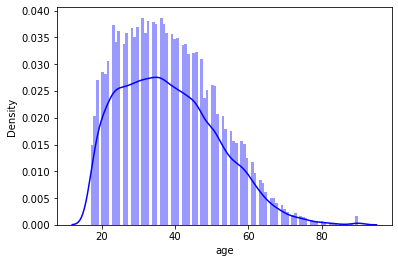

In [97]:
sns.distplot(train['age'],color='blue',bins=100)

<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

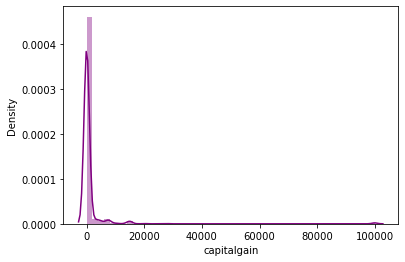

In [98]:
sns.distplot(train['capitalgain'],color='purple')

<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

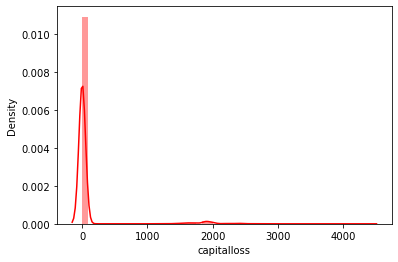

In [99]:
sns.distplot(train['capitalloss'],color='red')

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

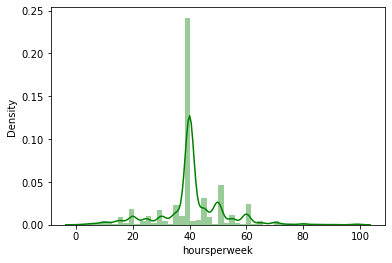

In [100]:
sns.distplot(train['hoursperweek'],color='green')

In [101]:
# Dropping the "native" column since it is not so important
train.drop(columns='native',inplace=True)
test.drop(columns='native',inplace=True)

In [102]:
train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'salary'],
      dtype='object')

In [103]:
test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'salary'],
      dtype='object')

In [104]:
# Get Dummies
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   30161 non-null  int64
 1   educationno                           30161 non-null  int64
 2   capitalgain                           30161 non-null  int64
 3   capitalloss                           30161 non-null  int64
 4   hoursperweek                          30161 non-null  int64
 5   salary                                30161 non-null  int32
 6   workclass_ Federal-gov                30161 non-null  uint8
 7   workclass_ Local-gov                  30161 non-null  uint8
 8   workclass_ Private                    30161 non-null  uint8
 9   workclass_ Self-emp-inc               30161 non-null  uint8
 10  workclass_ Self-emp-not-inc           30161 non-null  uint8
 11  workclass_ State-gov                  301

In [106]:
# Dropping the "salary" column and saving the features to temprory variables
temp1=train.drop(columns='salary')
temp2=test.drop(columns='salary')

In [107]:
temp1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,13,0,0,40,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
30158,58,9,0,0,40,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
30159,22,9,0,0,20,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


In [108]:
temp2

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,25,7,0,0,40,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
15058,44,13,5455,0,40,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1


In [109]:
# Seperating the train and test data into X and Y

X_train=temp1.iloc[:,:]
Y_train=train.iloc[:,5]

X_test=temp2.iloc[:,:]
Y_test=test.iloc[:,5]

In [110]:
X_train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,13,0,0,40,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
30158,58,9,0,0,40,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
30159,22,9,0,0,20,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


In [111]:
X_test

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,25,7,0,0,40,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
15058,44,13,5455,0,40,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1


In [112]:
Y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: salary, Length: 30161, dtype: int32

In [113]:
Y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: salary, Length: 15060, dtype: int32

In [114]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(30161, 62) (30161,) (15060, 62) (15060,)


# RBF

In [115]:
# Creating the model
rbf_clf=SVC(kernel='rbf',gamma=0.0001,C=1)
rbf_clf.fit(X_train,Y_train)

SVC(C=1, gamma=0.0001)

In [116]:
# Making predictions
Y_train_pred=rbf_clf.predict(X_train)
Y_test_pred=rbf_clf.predict(X_test)

In [117]:
# Accuracy for training data
accuracy_score(Y_train,Y_train_pred)

0.8217565730579225

In [118]:
# Accuracy for testing data
accuracy_score(Y_test,Y_test_pred)

0.8231739707835325

In [119]:
# Confusion matrix for training data
confusion_matrix(Y_train,Y_train_pred)

array([[22515,   138],
       [ 5238,  2270]], dtype=int64)

In [120]:
# Confusion matrix for testing data
confusion_matrix(Y_test,Y_test_pred)

array([[11290,    70],
       [ 2593,  1107]], dtype=int64)

In [121]:
# Classification Report for testing data
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     11360
           1       0.94      0.30      0.45      3700

    accuracy                           0.82     15060
   macro avg       0.88      0.65      0.67     15060
weighted avg       0.84      0.82      0.79     15060



In [122]:
# Classification Report for training data
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     22653
           1       0.94      0.30      0.46      7508

    accuracy                           0.82     30161
   macro avg       0.88      0.65      0.68     30161
weighted avg       0.84      0.82      0.78     30161



The Precision, Recall and F1-score looks good for both testing and training data.

# The final accuracy for test data is 82 % (RBF Kernel)